# Introduction

Welcome to *tntorch*! This notebook illustrates a few basic tensor manipulation and optimization use cases.

### First Example

In [21]:
import torch
import tntorch as tn

Let's create a 2D random tensor of size $128 \times 128$ and tensor train rank 10 (equivalent to a rank-10 matrix). The `requires_grad` flag tells PyTorch that this tensor should be optimizable:

In [22]:
t = tn.randn([128, 128], ranks_tt=10, requires_grad=True)
t

2D TT tensor:

 128 128
  |   |
 (0) (1)
 / \ / \
1   10  1

The spatial dimensions are shown above, the TT ranks are below, and the cores are listed as `(0)` and `(1)` in the middle.

In many ways, compressed tensors can be treated as if they were normal, uncompressed tensors:

In [23]:
print(tn.mean(t))
print(tn.var(t))
print(tn.norm(t))
print(tn.norm(t+t))
print(tn.norm(2*t))

tensor(-0.0317, grad_fn=<DivBackward1>)
tensor(9.8816, grad_fn=<DivBackward1>)
tensor(402.3892, grad_fn=<SqrtBackward>)
tensor(804.7784, grad_fn=<SqrtBackward>)
tensor(804.7784, grad_fn=<SqrtBackward>)


To decompress a tensor into a `torch.Tensor`, we can use the function `full()`:

In [24]:
print(t.full().shape)

torch.Size([128, 128])


The function `numpy()` returns the same, just as a NumPy tensor. Let's use it to visualize the contents of our random tensor in *matplotlib*:

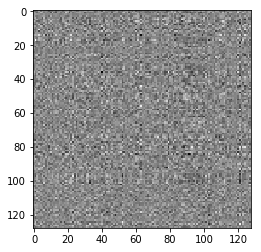

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(t.numpy(), cmap='gray')
plt.show()

To optimize tensors we can use *tntorch*'s helper function `optimize()`. 

Now, we will make our tensor zero over the top left quadrant by minimizing its norm:

iter: 0      | loss: 204.628599 | total time:    0.0008
iter: 500    | loss:  85.692796 | total time:    0.3905
iter: 1000   | loss:  19.786240 | total time:    0.7799
iter: 1424   | loss:   0.101251 | total time:    1.1166 <- converged (tol=0.0001)


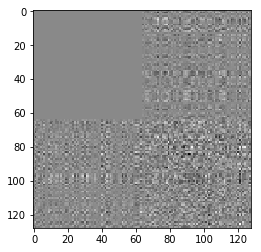

In [26]:
def loss(t):
    return tn.norm(t[:64, :64])

tn.optimize(t, loss)
plt.imshow(t.numpy(), cmap='gray')
plt.show()

### Second Example

Next, we will fit our tensor to be a rank-10 approximation of a grayscale image:

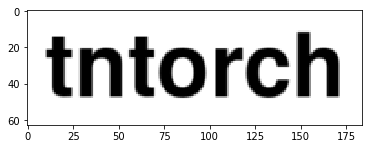

iter: 0      | loss: 198.471121 | total time:    0.0009
iter: 500    | loss:  29.788910 | total time:    0.7633
iter: 1000   | loss:  17.289485 | total time:    1.3507
iter: 1500   | loss:   7.400297 | total time:    1.9354
iter: 2000   | loss:   3.973999 | total time:    2.5072
iter: 2500   | loss:   2.852684 | total time:    3.1255
iter: 2619   | loss:   2.809835 | total time:    3.2721 <- converged (tol=0.0001)


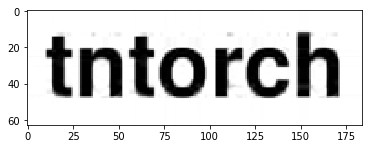

In [27]:
im = torch.DoubleTensor(plt.imread('../images/text.png'))
plt.imshow(im.numpy(), cmap='gray')
plt.show()

t = tn.rand(im.shape, ranks_tt=10, requires_grad=True)

def loss(t):
    return tn.distance(t, im)  # Equivalent to torch.norm(t.full() - im)

tn.optimize(t, loss)
plt.imshow(t.numpy(), cmap='gray', vmin=im.min(), vmax=im.max())
plt.show()

For other available tensor formats beyond plain TT, see [this notebook](https://github.com/rballester/tntorch/blob/master/tutorials/main_formats.ipynb).